In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [3]:
os.chdir("C:\\PYTHON\\New_classifer")

In [4]:
df=pd.read_csv("transformddata.csv")

# Data Preprocessing

In [7]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

In [18]:
df.describe()

,category,title,body,text,text_transform
count,6872,6872,6872,6872,6872
unique,14,6831,6815,6844,6841
top,ARTS & CULTURE,Extreme Weather Photos Of The Week,This week brought several big headlines in ext...,Extreme Weather Photos Of The Week This week b...,extrem weather photo week week brought sever b...
freq,1001,24,21,21,24


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6872 entries, 0 to 6871
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        6872 non-null   object
 1   title           6872 non-null   object
 2   body            6872 non-null   object
 3   text            6872 non-null   object
 4   text_transform  6872 non-null   object
dtypes: object(5)
memory usage: 268.6+ KB


In [25]:
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# EDA

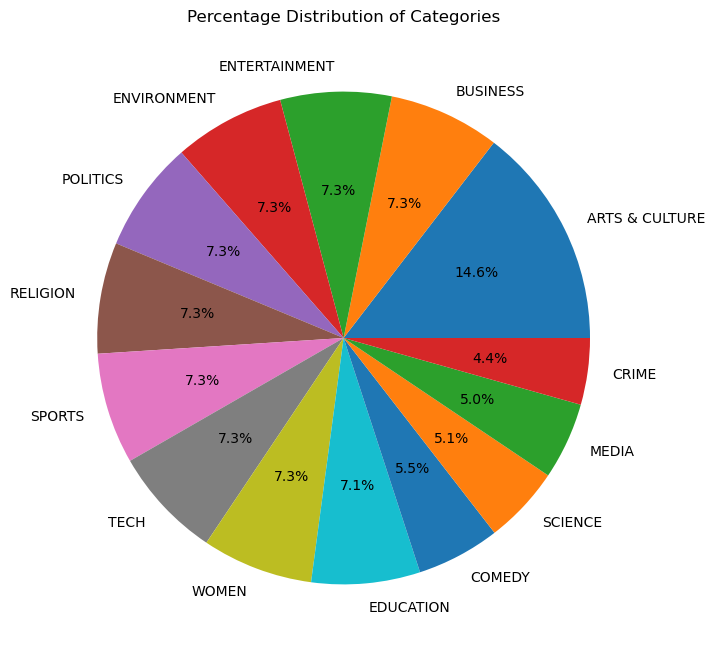

In [15]:
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(df['category'].value_counts(), labels=df['category'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Categories')

# Show the plot
plt.show()

# FEATURE ENGINNERING

In [20]:
#df['text_transform'] = df['title'] + " " + df['body']

# DATA CLEANING -NLP

In [21]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
word = "running"
stemmed_word = ps.stem(word)
print("Original:", word)
print("Stemmed:", stemmed_word)

Original: running
Stemmed: run


In [23]:
# 1.Lowercase 2.Tokenize 3.Alphanumeric 4.Stopwords 5.Stemming

def transformation(text):
    text=str(text).lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
     
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))  
    return " ".join(y)

# Model Selection

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['text_transform'], df['category_encoded'], test_size=0.2, random_state=42)

# Create a pipeline with TfidfVectorizer and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'tfidf__max_features': [1000, 2000, 3000],
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Decode the predicted and actual category labels
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model's performance
report = classification_report(y_test_decoded, y_pred_decoded, target_names=label_encoder.classes_)
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Classification Report:\n", report)
print("Accuracy:", accuracy)

KeyboardInterrupt: 

In [29]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))),
    ('svc', LinearSVC(class_weight='balanced'))
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'tfidf__max_features': [1000, 2000, 3000],
    'svc__C': [0.01, 0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Decode the predicted and actual category labels
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model's performance
report = classification_report(y_test_decoded, y_pred_decoded, target_names=label_encoder.classes_)
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Classification Report:\n", report)
print("Accuracy:", accuracy)


Best Parameters: {'svc__C': 0.1, 'tfidf__max_features': 3000}
Best Cross-Validation Score: 0.7893393994540491
Classification Report:
                 precision    recall  f1-score   support

ARTS & CULTURE       0.91      0.84      0.87       205
      BUSINESS       0.75      0.67      0.70       114
        COMEDY       0.79      0.73      0.76        74
         CRIME       0.65      0.89      0.76        57
     EDUCATION       0.84      0.82      0.83       108
 ENTERTAINMENT       0.81      0.76      0.78       100
   ENVIRONMENT       0.80      0.78      0.79        97
         MEDIA       0.71      0.70      0.70        66
      POLITICS       0.80      0.79      0.79       103
      RELIGION       0.84      0.91      0.88       101
       SCIENCE       0.72      0.85      0.78        55
        SPORTS       0.81      0.93      0.87       101
          TECH       0.72      0.75      0.74        84
         WOMEN       0.72      0.65      0.69       110

      accuracy          

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))),
    ('nb', MultinomialNB())
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'tfidf__max_features': [1000, 2000, 3000],
    'nb__alpha': [0.1, 1, 10]  # Alpha is the smoothing parameter for Naive Bayes
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Decode the predicted and actual category labels
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model's performance
report = classification_report(y_test_decoded, y_pred_decoded, target_names=label_encoder.classes_)
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Classification Report:\n", report)
print("Accuracy:", accuracy)


Best Parameters: {'nb__alpha': 0.1, 'tfidf__max_features': 3000}
Best Cross-Validation Score: 0.7658688063528827
Classification Report:
                 precision    recall  f1-score   support

ARTS & CULTURE       0.75      0.89      0.81       205
      BUSINESS       0.76      0.67      0.71       114
        COMEDY       0.78      0.68      0.72        74
         CRIME       0.69      0.88      0.78        57
     EDUCATION       0.84      0.81      0.82       108
 ENTERTAINMENT       0.78      0.71      0.74       100
   ENVIRONMENT       0.79      0.80      0.80        97
         MEDIA       0.75      0.59      0.66        66
      POLITICS       0.76      0.74      0.75       103
      RELIGION       0.82      0.85      0.83       101
       SCIENCE       0.75      0.73      0.74        55
        SPORTS       0.87      0.84      0.85       101
          TECH       0.67      0.71      0.69        84
         WOMEN       0.69      0.65      0.67       110

      accuracy       

# FINAL MODEL

In [32]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['text_transform'], df['category_encoded'], test_size=0.2, random_state=42)

# Create a pipeline with TfidfVectorizer and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'tfidf__max_features': [3000],
    'logreg__C': [1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Decode the predicted and actual category labels
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model's performance
report = classification_report(y_test_decoded, y_pred_decoded, target_names=label_encoder.classes_)
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Classification Report:\n", report)
print("Accuracy:", accuracy)

Best Parameters: {'logreg__C': 10, 'tfidf__max_features': 3000}
Best Cross-Validation Score: 0.7904298122259906
Classification Report:
                 precision    recall  f1-score   support

ARTS & CULTURE       0.89      0.83      0.86       205
      BUSINESS       0.73      0.65      0.69       114
        COMEDY       0.80      0.76      0.78        74
         CRIME       0.76      0.91      0.83        57
     EDUCATION       0.85      0.83      0.84       108
 ENTERTAINMENT       0.76      0.78      0.77       100
   ENVIRONMENT       0.83      0.79      0.81        97
         MEDIA       0.70      0.70      0.70        66
      POLITICS       0.81      0.81      0.81       103
      RELIGION       0.88      0.87      0.88       101
       SCIENCE       0.71      0.87      0.78        55
        SPORTS       0.88      0.89      0.89       101
          TECH       0.68      0.76      0.72        84
         WOMEN       0.71      0.71      0.71       110

      accuracy        

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=1000,
                                                        ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             n_jobs=-1,
             param_grid={'logreg__C': [1, 10], 'tfidf__max_features': [3000]},
             scoring='accuracy')

In [37]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

# Pickle the TfidfVectorizer object
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_.named_steps['tfidf'], file)